# User based collaborative filtering

In [12]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [1]:
## Importing modules

import pandas as pd
import surprise 
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
## Importing data
reviews = pd.read_csv(r'D:\yelp_dataset\yelp_dataset~\IL_review.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
business = pd.read_csv(r'D:\yelp_dataset\yelp_dataset~\business.csv', usecols= ['business_id', 'name'])
users = pd.read_csv(r'D:\yelp_dataset\yelp_dataset~\IL_users.csv', usecols= ['user_id', 'name'])

## Since users and business dataframe both have the same column names we will update them accordingly
users = users.rename(columns = { 'name': 'Username' })
business = business.rename(columns = { 'name': 'Restaurant name' })

In [ ]:
conda install scikit-surprise

In [ ]:
conda update --force conda

In [ ]:
conda update anaconda

In [3]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars'], dtype='object')

In [4]:
business.head()

,business_id,Restaurant name
0,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe
1,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab
2,uYBx50Yl_Jc-UYwFzudBsQ,Chew Doin Fried Chicken & Ramen
3,zjQDk4tZyhEroyqtkgvx0g,The Cobblestone Eatery and Drinkery
4,gI34hM-873fwF1XQ8hOaSg,Joe’s Pizza and Pasta


In [5]:
users.columns

Index(['user_id', 'Username'], dtype='object')

In [6]:
reviews.head()

,review_id,user_id,business_id,stars
0,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5.0
1,uGJubhANtj6sfP_xz8LeLQ,1EecTw-Iojid62ySMMl5gA,xR3inMR2KceU3b9dhkz_tw,4.0
2,xqp0pnO0PfBkaFRNaVImYw,c35f8FumQy5045zFbIir6w,_uyLoz0BbrQIVmUEm_td1Q,3.0
3,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0
4,GVoXS_AdNzSUbyNcoErdZQ,rqYkeGG9PBAdMRDvTMCmfw,MVmJuns9ZD9QLGltc0Am8g,5.0


### Since this is a userbased collaborative filtering, we have used stars given by user to make recommendations

In [7]:
# Combine the columns from the given dataframe to consist only of required columns for model
ratings_data = reviews.join(business.set_index('business_id'), on='business_id')
ratings_data = ratings_data.join(users.set_index('user_id'), on = 'user_id')
ratings_data.head()

,review_id,user_id,business_id,stars,Restaurant name,Username
0,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5.0,Itty-Bitty,Cheryl
1,uGJubhANtj6sfP_xz8LeLQ,1EecTw-Iojid62ySMMl5gA,xR3inMR2KceU3b9dhkz_tw,4.0,Lascelles Granite City,Brandi
2,xqp0pnO0PfBkaFRNaVImYw,c35f8FumQy5045zFbIir6w,_uyLoz0BbrQIVmUEm_td1Q,3.0,Jimmy The Greek's,Judy
3,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0,Chateau La VIn,Tina
4,GVoXS_AdNzSUbyNcoErdZQ,rqYkeGG9PBAdMRDvTMCmfw,MVmJuns9ZD9QLGltc0Am8g,5.0,Triple R's Smokehouse,Kim


In [29]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, business id and stars (in that order).
data = Dataset.load_from_df(ratings_data[['user_id', 'business_id', 'stars']], reader)

# An antiset is a set of those user and item pairs for which a rating doesn't exist in original dataset
# We will use this data for testing
anti_set = data.build_full_trainset().build_anti_testset()


In [9]:
business = business.drop_duplicates(['business_id' , 'Restaurant name'])
users = users.drop_duplicates(['user_id' , 'Username'])

In [25]:
## Fit the model with 3 splits

kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions
print(predictions)  
   # print(best_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3955
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3378
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4402
[Prediction(uid='8iEf-UoE6mQlrg2Arx_0Mg', iid='gXg277YblY5xsaeMzJ73TA', r_ui=5.0, est=3.6370558375634516, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='XMqqZ5H23yjpSGvuvsAIdQ', iid='KtpZkMxiOp1V9NEqMSMO3w', r_ui=1.0, est=3.6370558375634516, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='Hxx8FmhpxiugIrGRh8RDOg', iid='JRoY9Mx2LghIki2Uo1SOJA', r_ui=4.0, est=3.6370558375634516, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='Bd4AAHGkwgHpc9PPai_ICg', iid='rL68WmPRYvmSjRaQUoKwkQ', r_ui=4.0, est=3.6370558375634516, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(ui

In [50]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4763
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4171
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3421
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3610
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4425
1.3420818351921773


In [49]:
kf = KFold(n_splits=3)
algo = KNNBaseline(k=3)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse = rmse
        best_algo = algo
        best_pred = predictions

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3242
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2990
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3937


### Changing similarity option and setting the preference to user based filtering

In [57]:
sim_options = { 'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
print(best_rmse)    

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3218
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4057
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3971
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5055
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3366
1.3217545766445524


### Analyzing the predictions

In [58]:
pred_df = pd.DataFrame(best_pred).merge(ratings_data , left_on = ['uid', 'iid'], right_on = ['user_id', 'business_id'])
pred_df[['uid', 'iid',  'Username', 'user_id', 'Restaurant name', 'business_id', 'est','stars']]

,uid,iid,Username,user_id,Restaurant name,business_id,est,stars
0,10n3msQJMjKrUMC58EnmOw,BDYL4lMlT6fpKgiNlJRclA,Malik,10n3msQJMjKrUMC58EnmOw,Red Lobster,BDYL4lMlT6fpKgiNlJRclA,3.652542,5.0
1,FR6IAJg1Dx7RE1BbEHB69Q,DszOO6k_s2wuGhTw2AsUdA,Sarah,FR6IAJg1Dx7RE1BbEHB69Q,Olive Garden Italian Restaurant,DszOO6k_s2wuGhTw2AsUdA,3.652542,4.0
2,rqYkeGG9PBAdMRDvTMCmfw,CfR34FRl5Eoka0rSusrfNA,Kim,rqYkeGG9PBAdMRDvTMCmfw,Casa Azteca,CfR34FRl5Eoka0rSusrfNA,3.403509,4.0
3,TNMu-Y66XfLwJGUTcltX5w,N44roXfLNkBdpINQDjEFOQ,Bella,TNMu-Y66XfLwJGUTcltX5w,Carisilo's Mexican Restaurant,N44roXfLNkBdpINQDjEFOQ,3.652542,4.0
4,oP_W33ZQojlrfbg1sKfeGQ,46fEorqn2nVbxdclHdHdKg,Nick,oP_W33ZQojlrfbg1sKfeGQ,Gentelin's On Broadway,46fEorqn2nVbxdclHdHdKg,3.652542,4.0
...,...,...,...,...,...,...,...,...
114,7bB4V2bchlMbdWVosxMmsg,gXg277YblY5xsaeMzJ73TA,Joey,7bB4V2bchlMbdWVosxMmsg,Wang Gang Asian,gXg277YblY5xsaeMzJ73TA,3.652542,4.0
115,qxNHdPkFzDEgTLRie9NoBg,IS0B5nLJPluVT8NwGgospA,Colin,qxNHdPkFzDEgTLRie9NoBg,Cheddar's Scratch Kitchen,IS0B5nLJPluVT8NwGgospA,3.652542,4.0
116,d_6FDayE3Lwg2Llm_ZKiaw,gXg277YblY5xsaeMzJ73TA,Guisel,d_6FDayE3Lwg2Llm_ZKiaw,Wang Gang Asian,gXg277YblY5xsaeMzJ73TA,3.652542,3.0
117,vm1155WoaJQVWu_6_0iwPw,A0zZI5AnaeK4-vKoc9ABmg,Jonquil,vm1155WoaJQVWu_6_0iwPw,Aroy Thai,A0zZI5AnaeK4-vKoc9ABmg,3.652542,5.0


In [59]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(business , left_on = ['iid'], right_on = ['business_id'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['user_id'])

In [60]:
pred_df[:20]

,uid,iid,r_ui,est,details,business_id,Restaurant name,user_id,Username
0,LWTvg7RlyNLXIf482tXBPw,xR3inMR2KceU3b9dhkz_tw,3.656514,3.233766,"{'actual_k': 1, 'was_impossible': False}",xR3inMR2KceU3b9dhkz_tw,Lascelles Granite City,LWTvg7RlyNLXIf482tXBPw,Cheryl
1,LWTvg7RlyNLXIf482tXBPw,_uyLoz0BbrQIVmUEm_td1Q,3.656514,3.250000,"{'actual_k': 0, 'was_impossible': False}",_uyLoz0BbrQIVmUEm_td1Q,Jimmy The Greek's,LWTvg7RlyNLXIf482tXBPw,Cheryl
2,LWTvg7RlyNLXIf482tXBPw,_D7QoWuQKMXk0mEE7r_Ftw,3.656514,4.750000,"{'actual_k': 0, 'was_impossible': False}",_D7QoWuQKMXk0mEE7r_Ftw,Chateau La VIn,LWTvg7RlyNLXIf482tXBPw,Cheryl
3,LWTvg7RlyNLXIf482tXBPw,MVmJuns9ZD9QLGltc0Am8g,3.656514,3.000000,"{'actual_k': 0, 'was_impossible': False}",MVmJuns9ZD9QLGltc0Am8g,Triple R's Smokehouse,LWTvg7RlyNLXIf482tXBPw,Cheryl
4,LWTvg7RlyNLXIf482tXBPw,bQKqeYwaHNal7JFAXzCMFg,3.656514,4.625000,"{'actual_k': 0, 'was_impossible': False}",bQKqeYwaHNal7JFAXzCMFg,Super Gyros,LWTvg7RlyNLXIf482tXBPw,Cheryl
5,LWTvg7RlyNLXIf482tXBPw,c2HzB7UmtGnXSOR4bg3-JQ,3.656514,3.000000,"{'actual_k': 0, 'was_impossible': False}",c2HzB7UmtGnXSOR4bg3-JQ,Dragon Palace,LWTvg7RlyNLXIf482tXBPw,Cheryl
6,LWTvg7RlyNLXIf482tXBPw,sMjjClYrGEXcTFG66qmg8A,3.656514,4.777778,"{'actual_k': 0, 'was_impossible': False}",sMjjClYrGEXcTFG66qmg8A,Thai House,LWTvg7RlyNLXIf482tXBPw,Cheryl
7,LWTvg7RlyNLXIf482tXBPw,IS0B5nLJPluVT8NwGgospA,3.656514,3.200000,"{'actual_k': 0, 'was_impossible': False}",IS0B5nLJPluVT8NwGgospA,Cheddar's Scratch Kitchen,LWTvg7RlyNLXIf482tXBPw,Cheryl
8,LWTvg7RlyNLXIf482tXBPw,_ic0Q-ptC259Kpu8lIWxTw,3.656514,3.642857,"{'actual_k': 0, 'was_impossible': False}",_ic0Q-ptC259Kpu8lIWxTw,Gia's Pizza,LWTvg7RlyNLXIf482tXBPw,Cheryl
9,LWTvg7RlyNLXIf482tXBPw,qXZooaeOrKHCrLHK99VHwg,3.656514,4.875000,"{'actual_k': 0, 'was_impossible': False}",qXZooaeOrKHCrLHK99VHwg,Chick-fil-A,LWTvg7RlyNLXIf482tXBPw,Cheryl


In [64]:
## Recommend a restaurant to the user if the estimated rating is equal to 5

pred_df[(pred_df['est'] == 5)&(pred_df['user_id']=='LWTvg7RlyNLXIf482tXBPw')]

,uid,iid,r_ui,est,details,business_id,Restaurant name,user_id,Username
20,LWTvg7RlyNLXIf482tXBPw,Birks4csk8zknL5a5QCiow,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",Birks4csk8zknL5a5QCiow,Mello Freeze,LWTvg7RlyNLXIf482tXBPw,Cheryl
36,LWTvg7RlyNLXIf482tXBPw,O0RUvUvseXAFN7ivhFej7g,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",O0RUvUvseXAFN7ivhFej7g,Aldi,LWTvg7RlyNLXIf482tXBPw,Cheryl
46,LWTvg7RlyNLXIf482tXBPw,7KKre8EbV95w_MbYTknCPw,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",7KKre8EbV95w_MbYTknCPw,Sonic Drive-In,LWTvg7RlyNLXIf482tXBPw,Cheryl
68,LWTvg7RlyNLXIf482tXBPw,SjA4XGt_vsea8KiESkWI_w,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",SjA4XGt_vsea8KiESkWI_w,Wicked Smoke Bar B Que,LWTvg7RlyNLXIf482tXBPw,Cheryl
69,LWTvg7RlyNLXIf482tXBPw,5D-Gjagh385iopO3xqjjIQ,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",5D-Gjagh385iopO3xqjjIQ,McDonald's,LWTvg7RlyNLXIf482tXBPw,Cheryl
72,LWTvg7RlyNLXIf482tXBPw,T2oyb1q64y7I1hFHhPLFig,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",T2oyb1q64y7I1hFHhPLFig,Jack in the Box,LWTvg7RlyNLXIf482tXBPw,Cheryl
78,LWTvg7RlyNLXIf482tXBPw,avEtcSYtMMHdP2As_WYZzQ,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",avEtcSYtMMHdP2As_WYZzQ,Spiritos Italian Grocery,LWTvg7RlyNLXIf482tXBPw,Cheryl
84,LWTvg7RlyNLXIf482tXBPw,88muUf6A7LmQZK5AXwgtow,3.656514,5.0,"{'actual_k': 0, 'was_impossible': False}",88muUf6A7LmQZK5AXwgtow,Gators,LWTvg7RlyNLXIf482tXBPw,Cheryl


In [68]:
## get restaurants recommendations for given user

def get_recommendations(user_id, estimated_prediction):
    df_recommended = pred_df[(pred_df['est'] >= estimated_prediction) & (pred_df['user_id'] == user_id)]
    restaurants = df_recommended['Restaurant name']
    return restaurants
   

In [69]:
users

,user_id,Username
0,eTvp_hYnsrI5-ow_sQ31_g,Patt
1,DeqKbAFwcyeC5pvR-SereQ,Barry
2,vbGGRxKJocP7EQYs-sUhyw,Becky
3,T0dTu7r_zwDhE5AHE5TR3g,Jessica
4,efZ3lgvDWfq4-U6U-q-2lA,Desiree
...,...,...
516,QQn0DByk6xs0hZ72bhJXSA,Josh
517,RUDflLMzM3WXqJ3l8fScug,monika
518,2JGgm14jHroXUd6vEh9Qeg,Damian
519,yRUpQjiL-eE-8SalQrmrhA,Rebecca


In [70]:
## get recommendations for first five users with estimated rating equal to 5

for user in users.head(5).itertuples():
    print(user)
    recommendations = get_recommendations(user.user_id, 5)
    print('\n\nRecommendations are listed below for user ', user.Username)
    print('\n Top 10 Recommended Restaurants')
    print(recommendations[:10])

Pandas(Index=0, user_id='eTvp_hYnsrI5-ow_sQ31_g', Username='Patt')


Recommendations are listed below for user  Patt

 Top 10 Recommended Restaurants
3952               Gia's Pizza
3953               Chick-fil-A
3960                 Aroy Thai
3964              Mello Freeze
3979               Casa Azteca
3980                      Aldi
3990            Sonic Drive-In
4012    Wicked Smoke Bar B Que
4013                McDonald's
4016           Jack in the Box
Name: Restaurant name, dtype: object
Pandas(Index=1, user_id='DeqKbAFwcyeC5pvR-SereQ', Username='Barry')


Recommendations are listed below for user  Barry

 Top 10 Recommended Restaurants
38413                Mello Freeze
38428                        Aldi
38438              Sonic Drive-In
38460      Wicked Smoke Bar B Que
38461                  McDonald's
38464             Jack in the Box
38470    Spiritos Italian Grocery
38476                      Gators
Name: Restaurant name, dtype: object
Pandas(Index=2, user_id='vbGGRxKJocP7EQYs-

## Evaluation

### Finding Precision and Recall using a base threshold at 3

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [92]:
def precision_recall_at_k(predictions, k=10, threshold=3):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k(k=10)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [93]:
kf = KFold(n_splits=5)
algo = SVD()

prec_to_ave = []
rec_to_ave = []

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3)

    # Precision and recall can then be averaged over all users
    
    prec_to_ave.append(sum(prec for prec in precisions.values()) / len(precisions))
    rec_to_ave.append(sum(rec for rec in recalls.values()) / len(recalls))

In [94]:
def make_binary_tpr_fpr(predictions, threshold=3):
    pred_df = pd.DataFrame(predictions)
    pred_df['r_ui'].where(pred_df['r_ui']>threshold, 1, inplace=True)
    pred_df['r_ui'].where(pred_df['r_ui']<=threshold, 0, inplace=True)
    
    pred_df['est'].where(pred_df['est']>threshold, 1, inplace=True)
    pred_df['est'].where(pred_df['est']<=threshold, 0, inplace=True)

    return pred_df['r_ui'], pred_df['est'], 

true_r, est = make_binary_tpr_fpr(predictions)

In [95]:
fpr, tpr, thresholds = roc_curve(true_r, est)

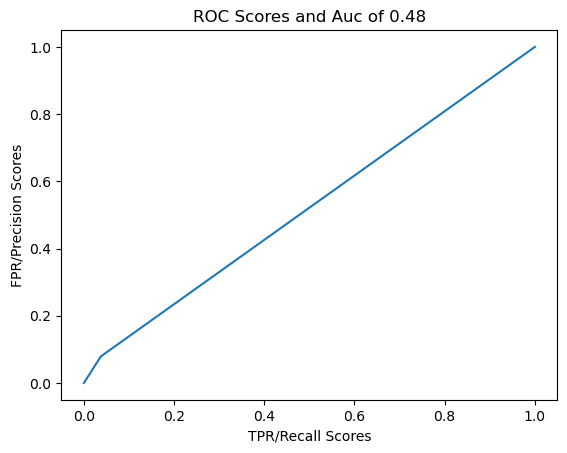

In [96]:
def graph_roc (true_r, est):
    
    fpr, tpr, thresholds = roc_curve(true_r, est)
    auc_ = auc(tpr, fpr)
    plt.plot(fpr,tpr, '-')
    plt.ylabel("FPR/Precision Scores")
    plt.xlabel("TPR/Recall Scores")
    plt.title("ROC Scores and Auc of " + str(round(auc_, 2)))
    plt.show()
    
graph_roc(true_r, est)

### Precision and Recall values using User-Average Ratings as a Threshold